In [1]:

import numpy as np

import seaborn as sns
sns.set(style="ticks")


from matplotlib import pyplot as plt
from crawlab_toolbox import plotting as genplt
from sklearn.metrics import confusion_matrix
import os
from scipy.stats import describe

import matplotlib.colors as colors

from joblib import dump, load
import datetime

In [2]:
clf_good_v2 = np.load('data/classification-Good-v2.npy',allow_pickle=True)
clf_bad_v2 = np.load('data/classification-Bad-v2.npy',allow_pickle=True)

clf_good_v2 = 1 - clf_good_v2
clf_bad_v2 = 1 - clf_bad_v2 

true_good_v2 = np.zeros_like(clf_good_v2)
true_bad_v2 = np.ones_like(clf_bad_v2)

pred_v2 = np.round(np.concatenate((clf_good_v2,clf_bad_v2)))
true_v2 = np.concatenate((true_good_v2,true_bad_v2))


clf_good_v1 = np.load('data/classification-Good-v1.npy',allow_pickle=True)
clf_bad_v1 = np.load('data/classification-Bad-v1.npy',allow_pickle=True)

true_good_v1 = np.zeros_like(clf_good_v1)
true_bad_v1 = np.ones_like(clf_bad_v1)

pred_v1 = np.round(np.concatenate((clf_good_v1,clf_bad_v1)))
true_v1 = np.concatenate((true_good_v1,true_bad_v1))



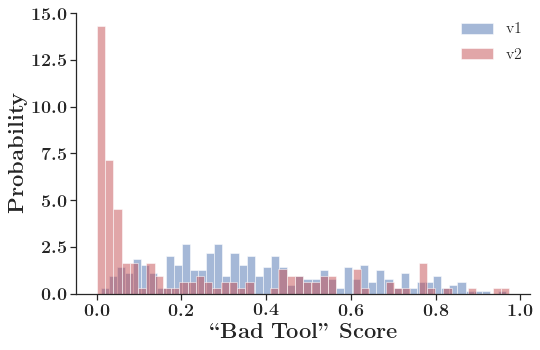

In [3]:
num_col = 1
legend_loc = 'best'
transparent=True
plt.figure(figsize=(9,6))
ax = plt.gca()
# the histogram of the data
n, bins, patches = plt.hist(clf_good_v1, 50, density=True, facecolor='b', alpha=0.50,label='v1')
n, bins, patches = plt.hist(clf_good_v2, 50, density=True, facecolor='r', alpha=0.50,label='v2')


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel(r'\textbf{``Bad Tool" Score}')
plt.ylabel(r'\textbf{Probability}')
ax.legend(ncol=num_col,loc=legend_loc,framealpha=float(not transparent)).get_frame().set_edgecolor('k')
plt.grid(False)
plt.savefig('figures/classification-good-compare.svg',transparent=True)     
plt.show()

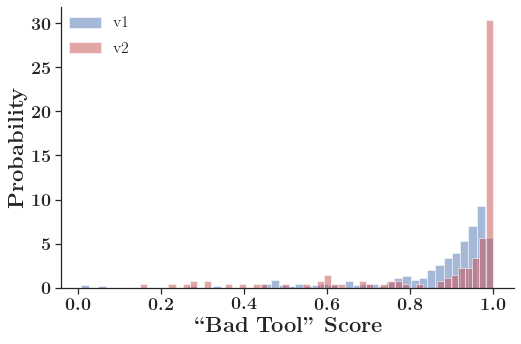

In [4]:
num_col = 1
legend_loc = 'best'
transparent=True
plt.figure(figsize=(9,6))
ax = plt.gca()
# the histogram of the data
n, bins, patches = plt.hist(clf_bad_v1, 50, density=True, facecolor='b', alpha=0.50,label='v1')
n, bins, patches = plt.hist(clf_bad_v2, 50, density=True, facecolor='r', alpha=0.50,label='v2')


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel(r'\textbf{``Bad Tool" Score}')
plt.ylabel(r'\textbf{Probability}')
ax.legend(ncol=num_col,loc=legend_loc,framealpha=float(not transparent)).get_frame().set_edgecolor('k')
plt.grid(False)
plt.savefig('figures/classification-bad-compare.svg',transparent=True)     
plt.show()

In [5]:
def fit_statistics(y_true, y_pred):

    conf_matrix = np.round(confusion_matrix(y_true, y_pred) / y_pred.shape[0],2)
    
    # Null hypothesis: tool is healthy
    # Positive: Tool is unhealthy
    # Negative: Tool is healthy
    
    true_positive = conf_matrix[0,0]
    true_negative = conf_matrix[1,1]
    
    # False positive: tool is actually healthy but classified as unhealthy
    # | - | X |
    # | - | - |
    false_positive = conf_matrix[0,1]
    
    # False negative: tool is actually unhealthy but classified as healthy
    # | - | - |
    # | X | - |
    false_negative = conf_matrix[1,0]
    
    # Precision: Quantifies false positives
    # Recall: Quantifies false negatives
    
    if true_positive == 0 and false_positive == 0.:
        precision = 0.
    else:
        precision = true_positive / (true_positive + false_positive)
    
    if true_positive == 0. and false_negative == 0.:
        recall = 0.
        true_positive_rate = 0.
    else:
        recall = true_positive / (true_positive + false_negative)
        true_positive_rate = true_positive / (true_positive + false_negative)

    if true_negative == 0. and false_positive == 0.:
        true_negative_rate = 0.
    else:
        true_negative_rate = true_negative / (true_negative + false_positive)
    
    balanced_accuracy = (true_positive_rate + true_negative_rate) / 2
    
    return balanced_accuracy, true_positive_rate, true_negative_rate, precision, recall
 

In [28]:
fit_statistics(true_v1,pred_v1)

(0.853925353925354,
 0.9459459459459459,
 0.7619047619047619,
 0.7,
 0.9459459459459459)

In [29]:
fit_statistics(true_v2,pred_v2)

(0.884090909090909,
 0.9318181818181819,
 0.8363636363636363,
 0.82,
 0.9318181818181819)